In [1]:
#Data cleanup here

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import csv
import json
import requests

In [39]:
hubs = ['New York-Newark-Jersey City', 'San Francisco-Oakland-Hayward', 'Seattle', 'Atlanta']

studio = pd.read_csv('MedianRent_Studio.csv')
studio['Type'] = 'studio'
one_bedroom = pd.read_csv('MedianRent_1Bedroom.csv')
one_bedroom['Type'] = 'one bedrooms'
two_bedroom = pd.read_csv('MedianRent_2Bedroom.csv')
two_bedroom['Type'] = 'two bedrooms'
three_bedroom = pd.read_csv('MedianRent_3Bedroom.csv')
three_bedroom['Type'] = 'three bedrooms'
four_bedroom = pd.read_csv('MedianRent_4Bedroom.csv')
four_bedroom['Type'] = 'four bedrooms'
five_bedroom = pd.read_csv('MedianRent_5BedroomOrMore.csv')
five_bedroom['Type'] = 'five bedrooms or more'
sfr = pd.read_csv('MedianRent_Sfr.csv')
sfr['Type'] = 'sfr'
all_homes = pd.read_csv('MedianRent_AllHomes.csv')
all_homes['Type'] = 'all homes'



In [40]:
merged_df = pd.merge(studio, one_bedroom, on=['RegionName', 'State', 'Metro'], suffixes=['_studio', '_one_bedroom'])
merged_df = pd.merge(merged_df, two_bedroom, on=['RegionName', 'State', 'Metro'], suffixes=['', '_two_bedroom'])
merged_df = pd.merge(merged_df, three_bedroom, on=['RegionName', 'State', 'Metro'], suffixes=['', '_three_bedroom'])
merged_df = pd.merge(merged_df, four_bedroom, on=['RegionName', 'State', 'Metro'], suffixes=['', '_four_bedroom'])
merged_df = pd.merge(merged_df, five_bedroom, on=['RegionName', 'State', 'Metro'], suffixes=['', '_five_bedroom'])
merged_df = pd.merge(merged_df, sfr, on=['RegionName', 'State', 'Metro'], suffixes=['', 'sfr'])
merged_df = pd.merge(merged_df, all_homes, on=['RegionName', 'State', 'Metro'], suffixes=['', 'all'])
merged_df
# studio.loc[studio['RegionName'].isin(hubs)]
# one_bedroom.loc[studio['RegionName'].isin(hubs)]
# studio.loc[studio['RegionName'].isin(hubs)]
# studio.loc[studio['RegionName'].isin(hubs)]
# studio.loc[studio['RegionName'].isin(hubs)]
# studio.loc[studio['RegionName'].isin(hubs)]
# studio.loc[studio['RegionName'].isin(hubs)]
# studio.loc[studio['RegionName'].isin(hubs)]

,Unnamed: 0_studio,RegionName,State,Metro,CountyName_studio,SizeRank_studio,2010-02_studio,2010-03_studio,2010-04_studio,2010-05_studio,...,2019-04all,2019-05all,2019-06all,2019-07all,2019-08all,2019-09all,2019-10all,2019-11all,2019-12all,Typeall
0,1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,...,3500.0,3500.0,3520.0,3500.0,3600.0,3607.0,3665.0,3600.0,3550.0,all homes
1,2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,...,1544.0,1550.0,1550.0,1550.0,1550.0,1550.0,1500.0,1500.0,1500.0,all homes
2,4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,...,1300.0,1325.0,1345.0,1349.0,1322.5,1299.0,1300.0,1299.0,1300.0,all homes
3,5,Philadelphia,PA,Philadelphia-Camden-Wilmington,Philadelphia County,6,NaN,NaN,NaN,NaN,...,1595.0,1595.0,1595.0,1550.0,1500.0,1500.0,1500.0,1500.0,1500.0,all homes
4,6,San Diego,CA,San Diego-Carlsbad,San Diego County,7,NaN,NaN,NaN,NaN,...,2750.0,2800.0,2750.0,2700.0,2750.0,2750.0,2700.0,2700.0,2750.0,all homes
5,8,Austin,TX,Austin-Round Rock,Travis County,9,NaN,NaN,NaN,NaN,...,1730.0,1750.0,1775.0,1795.0,1775.0,1750.0,1775.0,1770.0,1750.0,all homes
6,9,San Jose,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,10,NaN,NaN,NaN,NaN,...,3480.0,3500.0,3500.0,3500.0,3500.0,3425.0,3400.0,3395.0,3400.0,all homes
7,10,Jacksonville,FL,Jacksonville,Duval County,11,NaN,NaN,NaN,NaN,...,1299.0,1299.0,1295.0,1300.0,1300.0,1300.0,1350.0,1348.0,1349.0,all homes
8,12,Charlotte,NC,Charlotte-Concord-Gastonia,Mecklenburg County,13,NaN,NaN,NaN,NaN,...,1500.0,1500.0,1525.0,1530.0,1525.0,1500.0,1495.0,1500.0,1499.0,all homes
9,13,Fort Worth,TX,Dallas-Fort Worth-Arlington,Tarrant County,14,NaN,NaN,NaN,NaN,...,1600.0,1650.0,1650.0,1650.0,1650.0,1640.0,1600.0,1615.0,1600.0,all homes


In [46]:
plot_df = merged_df.groupby(['Metro', 'RegionName', 'Type']).median().dropna(axis = 1, how = 'any')

stacked = plot_df.stack()

stacked = pd.DataFrame(stacked).reset_index()

stacked.columns = ['Metro', 'RegionName', 'Type', 'Time', 'Cost']

stacked

,Metro,RegionName,Type,Time,Cost
0,Austin-Round Rock,Austin,two bedrooms,Unnamed: 0_studio,8.0
1,Austin-Round Rock,Austin,two bedrooms,SizeRank_studio,9.0
2,Austin-Round Rock,Austin,two bedrooms,2018-12_studio,1687.5
3,Austin-Round Rock,Austin,two bedrooms,2019-01_studio,1675.0
4,Austin-Round Rock,Austin,two bedrooms,2019-02_studio,1695.0
...,...,...,...,...,...
5368,Wichita,Wichita,two bedrooms,2019-08all,875.0
5369,Wichita,Wichita,two bedrooms,2019-09all,875.0
5370,Wichita,Wichita,two bedrooms,2019-10all,850.0
5371,Wichita,Wichita,two bedrooms,2019-11all,850.0


<IPython.core.display.Javascript object>


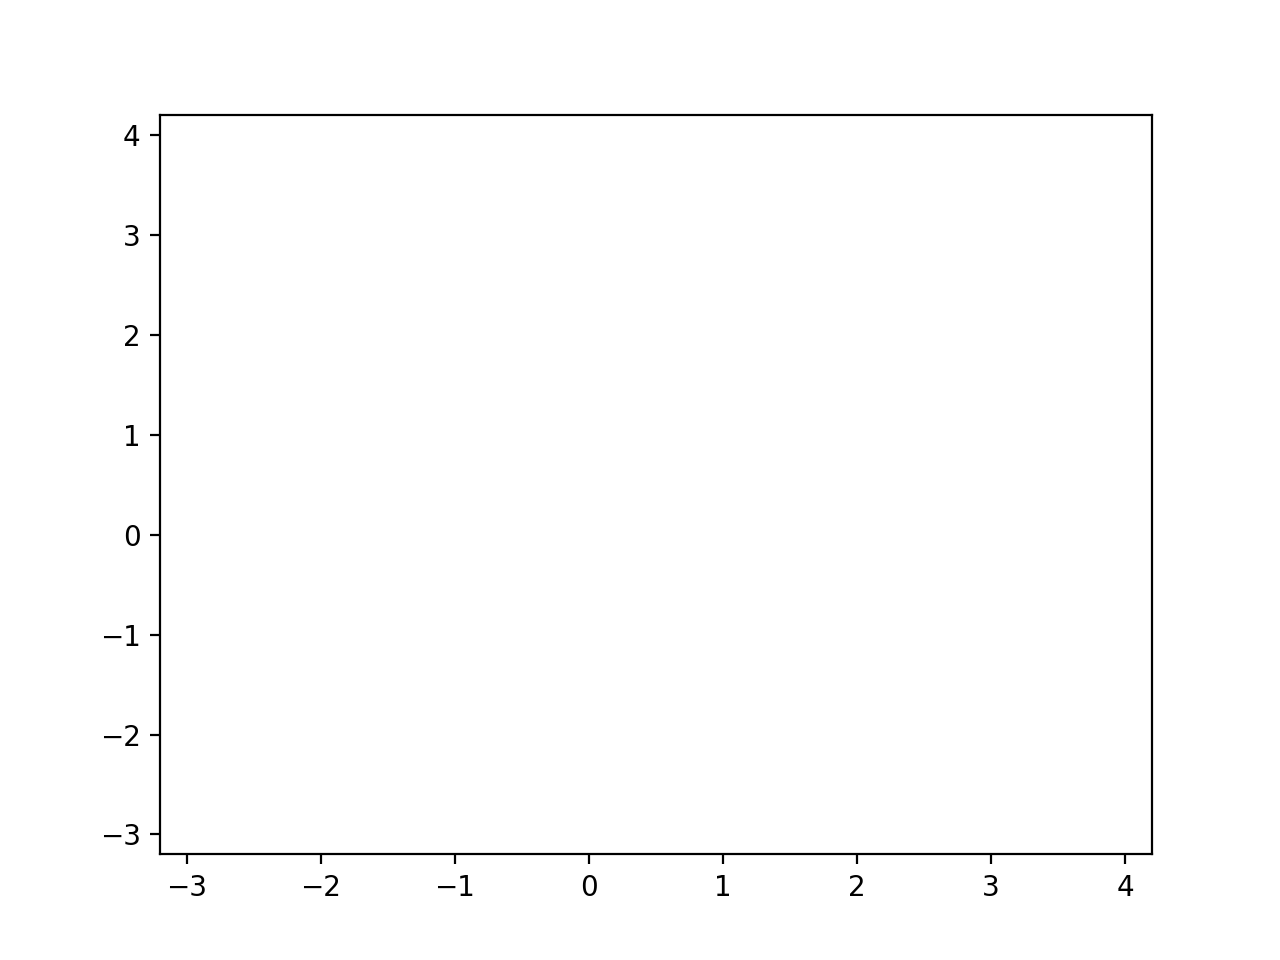

In [53]:


metro_list = stacked['Metro'].unique().tolist()
type_list = stacked['Type'].unique().tolist()


for i in metro_list:
    df = stacked.loc[stacked['Type'] == 'studio']
    x_axis = df['Time'].loc[df['Metro'] == i].tolist()
    y_axis = df['Cost'].loc[df['Metro'] == i].tolist()
    plt.plot(x_axis, y_axis)
